<a href="https://colab.research.google.com/github/Benji-Wagner/Heart-Disease-UCI/blob/master/Heart_Disease_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benji Wagner

This Heart-Disease-UCI dataset seems relatively simple. I hope I can use this dataset as practice for some visualizations and evaluating a simple machine learning model.

First, we need to import all the needed libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Now let's read in the data:

In [0]:
heart_data = pd.read_csv("/content/gdrive/My Drive/Repos/Heart-Disease-UCI/data/heart.csv")

In [0]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Before we continue further, let's see what the variable descriptions are, taken from Kaggle:

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Let's take a look at the datatypes

In [0]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Hmm, some of those aren't right. Let's correct some of these.

In [0]:
heart_data['sex'] = heart_data['sex'].astype('object')
heart_data['cp'] = heart_data['cp'].astype('object')
heart_data['fbs'] = heart_data['fbs'].astype('object')
heart_data['restecg'] = heart_data['restecg'].astype('object')
heart_data['exang '] = heart_data['exang'].astype('object')
heart_data['slope'] = heart_data['slope'].astype('object')
heart_data['thal'] = heart_data['thal'].astype('object')

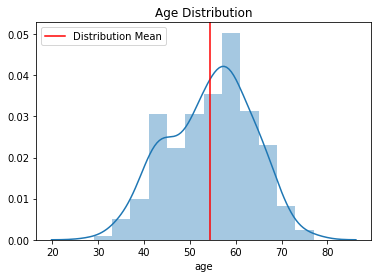

In [0]:
sns.distplot(heart_data.age);
plt.axvline(heart_data.age.mean(), 0, 1, color = 'red', label = 'Distribution Mean');
plt.legend(loc = 'upper left');
plt.title("Age Distribution");

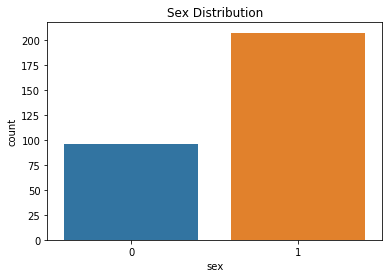

In [0]:
sns.countplot(heart_data.sex);
plt.title("Sex Distribution");